# Prediction using Supervised ML

##  Graduate Rotational Internship Program
## "The Sparks Foundation"

-------------------------------------------------------------------------------------------------------------------------------

### Task 1 - Predict the percentage of an student based on the number of studied hours.
-------------------------------------------------------------------------------------------------------------------------------

# Import Libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Check out the Data

In [49]:
url =  "http://bit.ly/w-data"
students_data = pd.read_csv(url)

In [50]:
students_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [51]:
students_data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [52]:
students_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [53]:
students_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [54]:
students_data.columns

Index(['Hours', 'Scores'], dtype='object')

# EDA

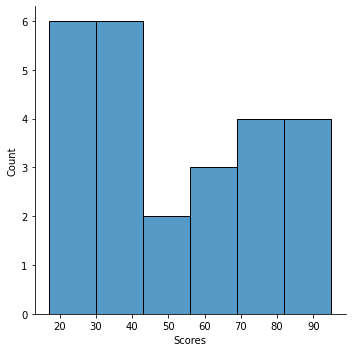

In [55]:
sns.displot(students_data['Scores'])

<AxesSubplot:xlabel='Scores', ylabel='Hours'>

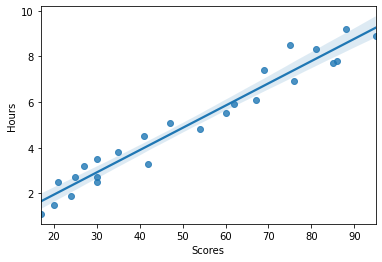

In [56]:
sns.regplot(x='Scores',y='Hours',data=students_data)

#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Linear Regression

### Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable

In [57]:
X = students_data['Hours']
y = students_data['Scores']
X=X.values.reshape(-1,1)
y=y.values.reshape(-1,1)

In [58]:
from sklearn.model_selection import train_test_split

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


## Creating and Training the Model

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lr = LinearRegression()

In [62]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
print(lr.intercept_)

[2.01816004]


## Prediction

In [64]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [65]:
prediction = lr.predict(X_test)

Text(0, 0.5, 'Prediction')

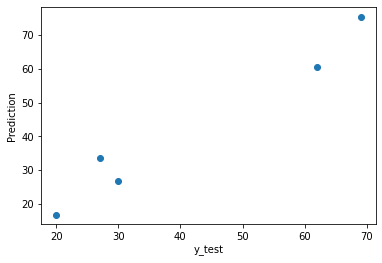

In [66]:
plt.scatter(y_test,prediction)
plt.xlabel('y_test')
plt.ylabel('Prediction')

In [67]:
print("What will be predicted score if a student studies for 9.25 hrs/ day?")
print("Predicted Score will be: ",round(lr.predict([[9.25]])[0][0],2),"%")

What will be predicted score if a student studies for 9.25 hrs/ day?
Predicted Score will be:  93.69 %


## Regression Evaluation Metrics

In [54]:
from sklearn import metrics

In [55]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 3.0139889428714977
MSE: 14.016616082349419
RMSE: 3.7438771457340074
